In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

In [2]:
def extract_numerical_substrings(input_string):
    # Use regular expression to find all substrings with numerical characters
    numerical_substrings = re.findall(r'\d+', input_string)
    return numerical_substrings

In [3]:
dataset_dir = 'WikiText/'
results_dir = 'trained_models_'

In [4]:
# collect from all the text files in the directory PennTreeBank the Test ppl values
# and store them in a pandas dataframe
qbits = "6qbits"
path = dataset_dir + results_dir + qbits
if not os.path.exists(path):
    raise FileNotFoundError(f"The directory {path} does not exist.")
files = [f for f in os.listdir(path) if f.endswith('.txt')]

# Initialize an empty DataFrame
df = pd.DataFrame(columns=['Model', 'Test ppl'])

# Collect data from files
data = []
for file in files:
    with open(os.path.join(path, file), 'r') as f:
        lines = f.readlines()
        print(f"Reading file: {file}")
        for line in lines:
            if 'Test ppl' in line:
                print(f"Found 'Test ppl' in line: {line.strip()}")
                try:
                    # get the string after the string "Test ppl:" and convert it to a float
                    test_ppl = extract_numerical_substrings(line)
                    print(f"Extracted numerical substrings: {test_ppl}")
                    test_ppl = float(test_ppl[8] + '.' + test_ppl[9])
                    data.append({'Model': file, 'Test ppl': test_ppl})
                except ValueError:
                    print(f"Could not convert value to float in file {file}: {line.split()[-1]}")
                except IndexError:
                    print(f"Line format is incorrect in file {file}: {line}")

# Create DataFrame from collected data
df = pd.DataFrame(data)
print("DataFrame created:", df)

# Clean the 'Model' column
df['Model'] = df['Model'].str.replace('.txt', '')
df['Model'] = df['Model'].str.replace('wiki_', '')
df['Model'] = df['Model'].str.replace('_6qbits', '')
df['Model'] = df['Model'].str.replace('_', ' ')
df['Model'] = df['Model'].str.replace('results', ' ')
# remove the remainder of the model name after the space
df['Model'] = df['Model'].str.split().str[0]
df = df.sort_values(by='Test ppl')
df = df.reset_index(drop=True)

print("Cleaned DataFrame:", df)

Reading file: results_FNet96_69086.txt
Found 'Test ppl' in line: Val. Loss: 5.174 |  Val. ppl: 176.54431016409583 | Val. Accuracy: 0.217	 Test Loss: 5.096 |  Test ppl: 163.35573288750876 | Test Accuracy: 0.219
Extracted numerical substrings: ['5', '174', '176', '54431016409583', '0', '217', '5', '096', '163', '35573288750876', '0', '219']
Reading file: results_LSTM96_150739.txt
Found 'Test ppl' in line: Val. Loss: 5.679 |  Val. ppl: 292.6728138657957 | Val. Accuracy: 0.209	 Test Loss: 5.621 |  Test ppl: 276.2829216632445 | Test Accuracy: 0.211
Extracted numerical substrings: ['5', '679', '292', '6728138657957', '0', '209', '5', '621', '276', '2829216632445', '0', '211']
Reading file: results_LSTM128_811781.txt
Found 'Test ppl' in line: Val. Loss: 5.552 |  Val. ppl: 257.72160931641724 | Val. Accuracy: 0.217	 Test Loss: 5.490 |  Test ppl: 242.1500167005254 | Test Accuracy: 0.217
Extracted numerical substrings: ['5', '552', '257', '72160931641724', '0', '217', '5', '490', '242', '15001670

In [5]:
# create a new DataFrame with the Test ppl values as rows and the model values as columns. The values of the DataFrame are the Test ppl values
df_pivot = df.pivot(columns='Model', values='Test ppl')
# rename column names
# insert a space between the model name and the number of qbits
df_pivot.columns = df_pivot.columns.str.replace('QLINSVT', 'Quixer' + ' (' + qbits +')')
df_pivot.columns = df_pivot.columns.str.replace('6qbits', '6 qbits, d=3')
# sort each column separetaly in ascending order taking into account the NaN values
df_pivot = df_pivot.apply(lambda x: x.sort_values().values)
# remove all the rowd with all NaN values
df_pivot = df_pivot.dropna(how='all')
df_pivot = df_pivot.reset_index(drop=True)
print("Pivoted DataFrame:", df_pivot)

Pivoted DataFrame: Model     FNet128      FNet96     LSTM128      LSTM96  Quixer (6 qbits, d=3)  \
0      154.534328  157.739300  232.967738  257.637610             180.556299   
1      155.896697  163.079695  233.369802  260.995394             181.232787   
2      156.066402  163.355733  235.460434  261.451069             182.006916   
3      157.067880  163.441514  237.217524  262.188005             185.461636   
4      157.763233  163.771798  237.894583  265.801466             187.166909   
5      158.021933  164.524017  238.948091  267.931025             187.259224   
6      159.043528  164.668315  240.513021  268.825412             188.595788   
7      159.316240  164.947760  241.220987  271.050304             190.767709   
8      161.635226  165.772028  241.599982  276.282922             193.502685   
9      164.937711  166.086154  242.150017  280.141002             198.358628   

Model      VAS128       VAS96  
0      132.975043  137.330267  
1      133.204799  137.816603  
2   

In [6]:
# read the postselection_probs.txt file and store the values in a pandas DataFrame
postselection_prob_6qbits_3d = pd.read_csv(path + '/final_probs.txt', header=None, sep=' ', names=['Postselection Probability', 'stddev'])
# remove the 'stddev' column
postselection_prob_6qbits_3d = postselection_prob_6qbits_3d['Postselection Probability']
postselection_prob_6qbits_3d = postselection_prob_6qbits_3d ** 2
postselection_prob_6qbits_3d.describe()

count    58885.000000
mean         0.043028
std          0.016442
min          0.022189
25%          0.032481
50%          0.039138
75%          0.051981
max          0.320451
Name: Postselection Probability, dtype: float64

In [7]:
# collect from all the text files in the directory PennTreeBank the Test ppl values
# and store them in a pandas dataframe
qbits = "6qbits_4d"
path = dataset_dir + results_dir + qbits
if not os.path.exists(path):
    raise FileNotFoundError(f"The directory {path} does not exist.")
files = [f for f in os.listdir(path) if f.endswith('.txt')]

# Initialize an empty DataFrame
df = pd.DataFrame(columns=['Model', 'Test ppl'])

# Collect data from files
data = []
for file in files:
    with open(os.path.join(path, file), 'r') as f:
        lines = f.readlines()
        print(f"Reading file: {file}")
        for line in lines:
            if 'Test ppl' in line:
                print(f"Found 'Test ppl' in line: {line.strip()}")
                try:
                    # get the string after the string "Test ppl:" and convert it to a float
                    test_ppl = extract_numerical_substrings(line)
                    print(f"Extracted numerical substrings: {test_ppl}")
                    test_ppl = float(test_ppl[8] + '.' + test_ppl[9])
                    data.append({'Model': file, 'Test ppl': test_ppl})
                except ValueError:
                    print(f"Could not convert value to float in file {file}: {line.split()[-1]}")
                except IndexError:
                    print(f"Line format is incorrect in file {file}: {line}")

# Create DataFrame from collected data
df = pd.DataFrame(data)
print("DataFrame created:", df)

# Clean the 'Model' column
df['Model'] = df['Model'].str.replace('.txt', '')
df['Model'] = df['Model'].str.replace('wiki_', '')
df['Model'] = df['Model'].str.replace('_6qbits', '')
df['Model'] = df['Model'].str.replace('_', ' ')
df['Model'] = df['Model'].str.replace('results', ' ')
# remove the remainder of the model name after the space
df['Model'] = df['Model'].str.split().str[0]
df = df.sort_values(by='Test ppl')
df = df.reset_index(drop=True)

print("Cleaned DataFrame:", df)

Reading file: results_QLINSVT_315625.txt
Found 'Test ppl' in line: Val. Loss: 5.268 |  Val. ppl: 194.06120995948828 | Val. Accuracy: 0.219	 Test Loss: 5.203 |  Test ppl: 181.7625120431481 | Test Accuracy: 0.221
Extracted numerical substrings: ['5', '268', '194', '06120995948828', '0', '219', '5', '203', '181', '7625120431481', '0', '221']
Reading file: results_QLINSVT_361360.txt
Found 'Test ppl' in line: Val. Loss: 5.311 |  Val. ppl: 202.64745272003495 | Val. Accuracy: 0.217	 Test Loss: 5.244 |  Test ppl: 189.38090557553915 | Test Accuracy: 0.218
Extracted numerical substrings: ['5', '311', '202', '64745272003495', '0', '217', '5', '244', '189', '38090557553915', '0', '218']
Reading file: results_QLINSVT_704838.txt
Found 'Test ppl' in line: Val. Loss: 5.271 |  Val. ppl: 194.69989162228765 | Val. Accuracy: 0.216	 Test Loss: 5.198 |  Test ppl: 180.95521315636677 | Test Accuracy: 0.219
Extracted numerical substrings: ['5', '271', '194', '69989162228765', '0', '216', '5', '198', '180', '95

In [8]:
# create a new DataFrame with the Test ppl values as rows and the model values as columns. The values of the DataFrame are the Test ppl values
df_pivot_6qbits_d4 = df.pivot(columns='Model', values='Test ppl')
# rename column names
# insert a space between the model name and the number of qbits
df_pivot_6qbits_d4.columns = df_pivot_6qbits_d4.columns.str.replace('QLINSVT', 'Quixer' + ' (' + qbits +')')
df_pivot_6qbits_d4.columns = df_pivot_6qbits_d4.columns.str.replace('6qbits_4d', '6 qbits, d=4')
# sort each column separetaly in ascending order taking into account the NaN values
df_pivot_6qbits_d4 = df_pivot_6qbits_d4.apply(lambda x: x.sort_values().values)
# remove all the rowd with all NaN values
df_pivot_6qbits_d4 = df_pivot_6qbits_d4.dropna(how='all')
df_pivot_6qbits_d4 = df_pivot_6qbits_d4.reset_index(drop=True)
print("Pivoted DataFrame:", df_pivot_6qbits_d4)

Pivoted DataFrame: Model  Quixer (6 qbits, d=4)
0                 178.899145
1                 179.689249
2                 180.428527
3                 180.955213
4                 181.038996
5                 181.762512
6                 182.045278
7                 183.382477
8                 184.214556
9                 189.380906


In [9]:
# read the postselection_probs.txt file and store the values in a pandas DataFrame
postselection_prob_6qbits_4d = pd.read_csv(path + '/final_probs.txt', header=None, sep=' ', names=['Postselection Probability', 'stddev'])
# remove the 'stddev' column
postselection_prob_6qbits_4d = postselection_prob_6qbits_4d['Postselection Probability']
postselection_prob_6qbits_4d = postselection_prob_6qbits_4d ** 2
postselection_prob_6qbits_4d.describe()

count    679800.000000
mean          0.073295
std           0.036626
min           0.005557
25%           0.046698
50%           0.076844
75%           0.093562
max           0.401273
Name: Postselection Probability, dtype: float64

In [10]:
# append the new DataFrame to df_pivot
df_pivot = pd.concat([df_pivot, df_pivot_6qbits_d4], axis=1)
#df_pivot = df_pivot[['FNet', 'LSTM', 'VAS', 'Quixer (5 qbits)', 'Quixer (6 qbits)', 'Quixer (7 qbits)']]
df_pivot = df_pivot[['FNet96', 'FNet128', 'LSTM96', 'LSTM128', 'VAS96', 'VAS128', 'Quixer (6 qbits, d=3)', 'Quixer (6 qbits, d=4)']]
# remane the columns
df_pivot.columns = ['FNet (96)', 'FNet (128)', 'LSTM (96)', 'LSTM (128)', 'Tranformer (96)', 'Tranformer (128)', 'Quixer (6 qbits, d=3)', 'Quixer (6 qbits, d=4)']

print("Pivoted DataFrame:", df_pivot)

Pivoted DataFrame:     FNet (96)  FNet (128)   LSTM (96)  LSTM (128)  Tranformer (96)  \
0  157.739300  154.534328  257.637610  232.967738       137.330267   
1  163.079695  155.896697  260.995394  233.369802       137.816603   
2  163.355733  156.066402  261.451069  235.460434       137.820561   
3  163.441514  157.067880  262.188005  237.217524       138.072189   
4  163.771798  157.763233  265.801466  237.894583       138.223084   
5  164.524017  158.021933  267.931025  238.948091       138.591830   
6  164.668315  159.043528  268.825412  240.513021       138.632568   
7  164.947760  159.316240  271.050304  241.220987       138.693342   
8  165.772028  161.635226  276.282922  241.599982       139.050137   
9  166.086154  164.937711  280.141002  242.150017       139.107851   

   Tranformer (128)  Quixer (6 qbits, d=3)  Quixer (6 qbits, d=4)  
0        132.975043             180.556299             178.899145  
1        133.204799             181.232787             179.689249  
2     

In [11]:
df_pivot = df_pivot[['Quixer (6 qbits, d=3)', 'Quixer (6 qbits, d=4)']]
stats = df_pivot.describe()
stats

,"Quixer (6 qbits, d=3)","Quixer (6 qbits, d=4)"
count,10.000000,10.000000
mean,187.490858,182.179686
std,5.654994,2.990139
min,180.556299,178.899145
25%,182.870596,180.560199
50%,187.213066,181.400754
75%,190.224729,183.048177
max,198.358628,189.380906


In [12]:
# create a latex table with the stats
latex_table = stats.to_latex(float_format="%.2f")
print(latex_table)

\begin{tabular}{lrr}
\toprule
 & Quixer (6 qbits, d=3) & Quixer (6 qbits, d=4) \\
\midrule
count & 10.00 & 10.00 \\
mean & 187.49 & 182.18 \\
std & 5.65 & 2.99 \\
min & 180.56 & 178.90 \\
25% & 182.87 & 180.56 \\
50% & 187.21 & 181.40 \\
75% & 190.22 & 183.05 \\
max & 198.36 & 189.38 \\
\bottomrule
\end{tabular}



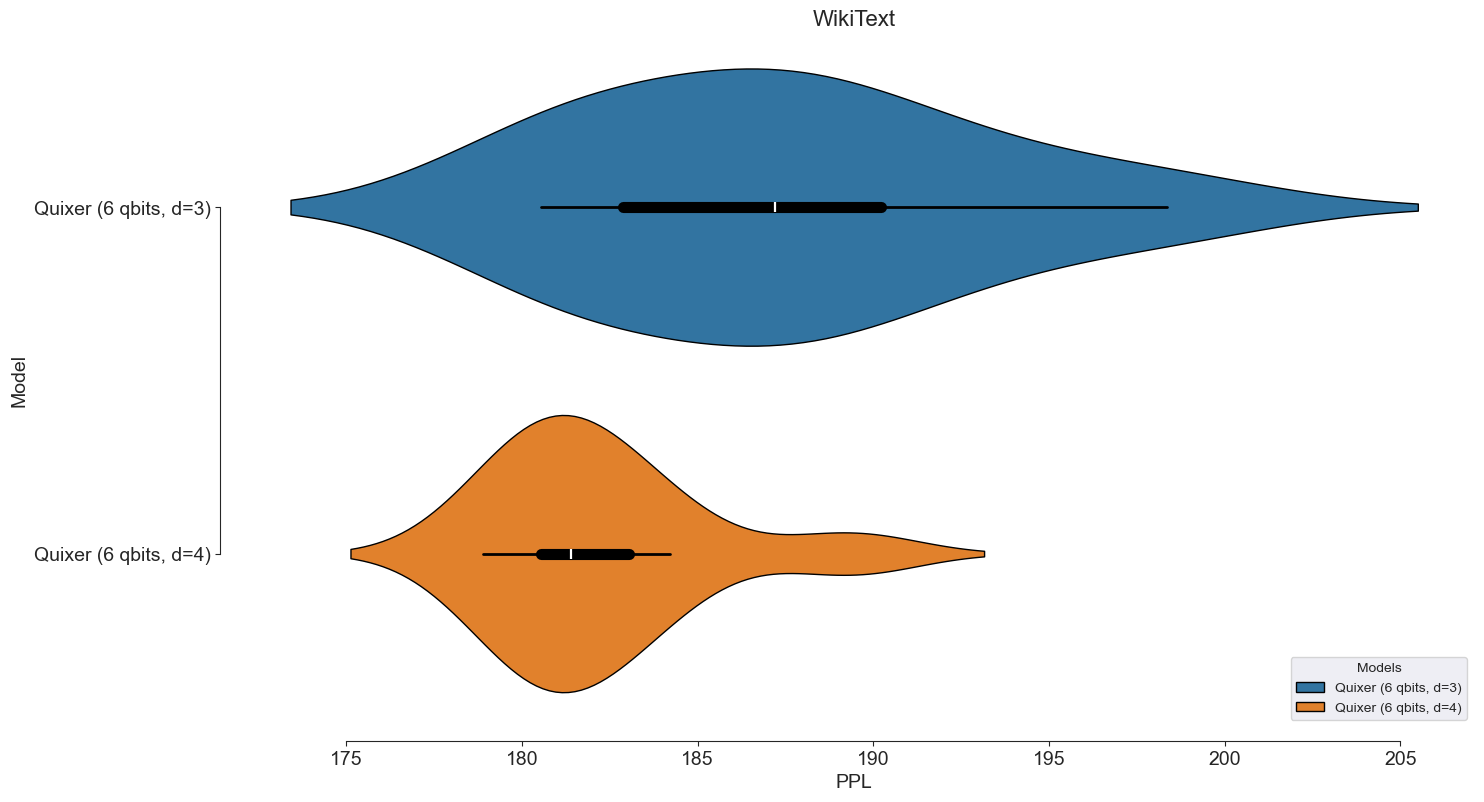

In [13]:
# plot a boxplot of the each column of the DataFrame
# remove all columns except the ones with Quixer models
plt.figure(figsize=(16, 9))
with sns.axes_style("ticks"):
    sns.violinplot(data=df_pivot, orient='h', linewidth=1, legend=True, linecolor="k", inner_kws=dict(box_width=8, whis_width=2))
    sns.despine(offset=10, trim=True)
plt.grid(False)
plt.title(dataset_dir[:-1], fontsize=16)
plt.ylabel('Model', fontsize=14)
plt.xlabel('PPL', fontsize=14)
# set labels font size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='Models', loc='lower right')
plt.savefig(dataset_dir + dataset_dir[:-1] + '_boxplot_d.png', dpi=300, bbox_inches='tight')
plt.show()

In [14]:
# Combine postselection probabilities in a single DataFrame with the model names as columns
postselection_prob = pd.concat([postselection_prob_6qbits_3d, postselection_prob_6qbits_4d], axis=1)
postselection_prob.columns = ['Quixer (6 qubits, d=3)', 'Quixer (6 qubits, d=4)']
# exclude all rows with values grater than 0.5
post_stats = postselection_prob.describe()

In [15]:
postselection_prob = postselection_prob[postselection_prob <= 0.5]

In [16]:
# create a latex table with the stats
latex_table = post_stats.to_latex(float_format="%.4f")
print(latex_table)

\begin{tabular}{lrr}
\toprule
 & Quixer (6 qubits, d=3) & Quixer (6 qubits, d=4) \\
\midrule
count & 58885.0000 & 679800.0000 \\
mean & 0.0430 & 0.0733 \\
std & 0.0164 & 0.0366 \\
min & 0.0222 & 0.0056 \\
25% & 0.0325 & 0.0467 \\
50% & 0.0391 & 0.0768 \\
75% & 0.0520 & 0.0936 \\
max & 0.3205 & 0.4013 \\
\bottomrule
\end{tabular}



/var/folders/m0/92gfbc6x10s7fdvbqfp73yqh0000gn/T/ipykernel_15968/1789753990.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right')


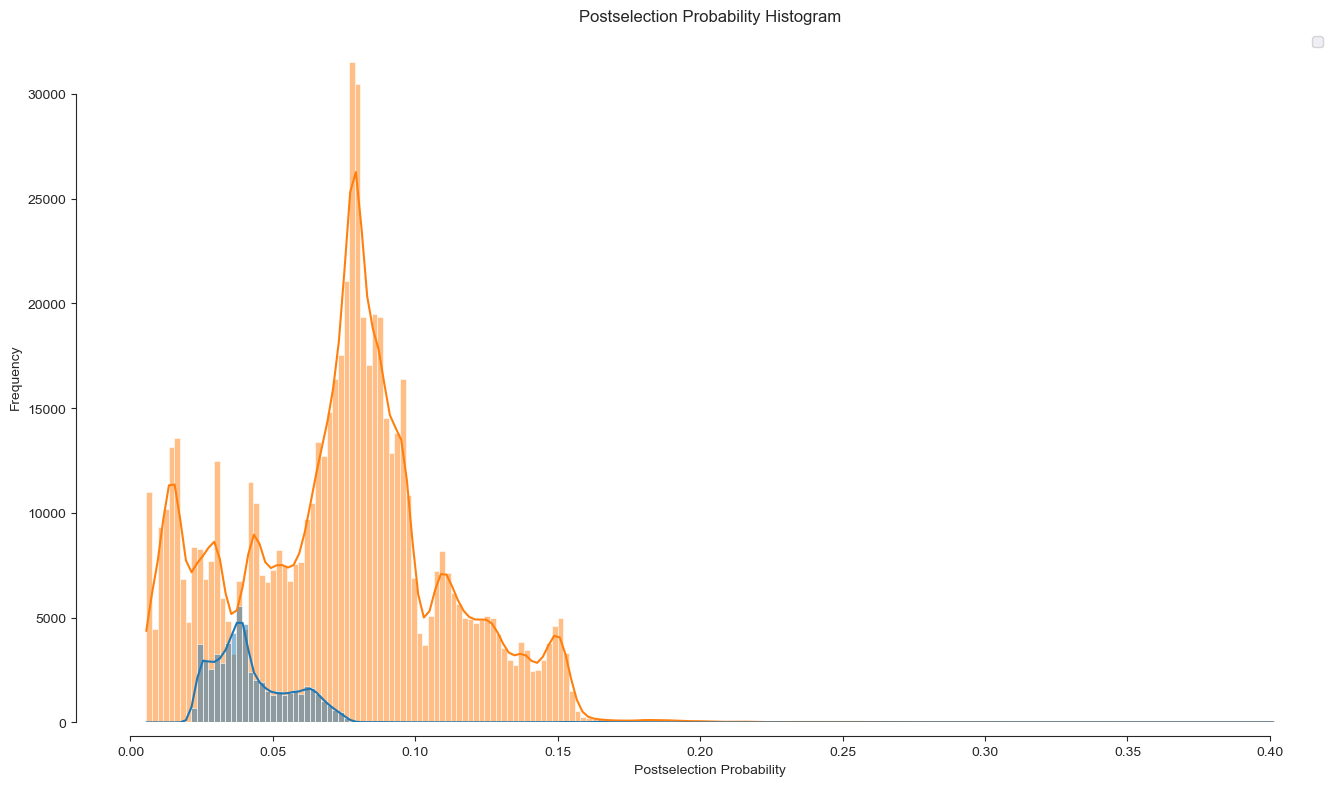

In [17]:
# plot the histogram of the postselection probabilities
plt.figure(figsize=(16, 9))
with sns.axes_style("ticks"):
    sns.histplot(postselection_prob, bins=200, kde=True, color='green', legend=False)
    sns.despine(offset=10, trim=True)
plt.grid(False)
plt.title('Postselection Probability Histogram')
plt.ylabel('Frequency')
plt.xlabel('Postselection Probability')
plt.legend(loc='upper right')
#plt.xlim(0, 0.03)
plt.savefig('WikiText/trained_models_6qbits/postselection_prob_histogram_6qbits_d.png', dpi=300, bbox_inches='tight')

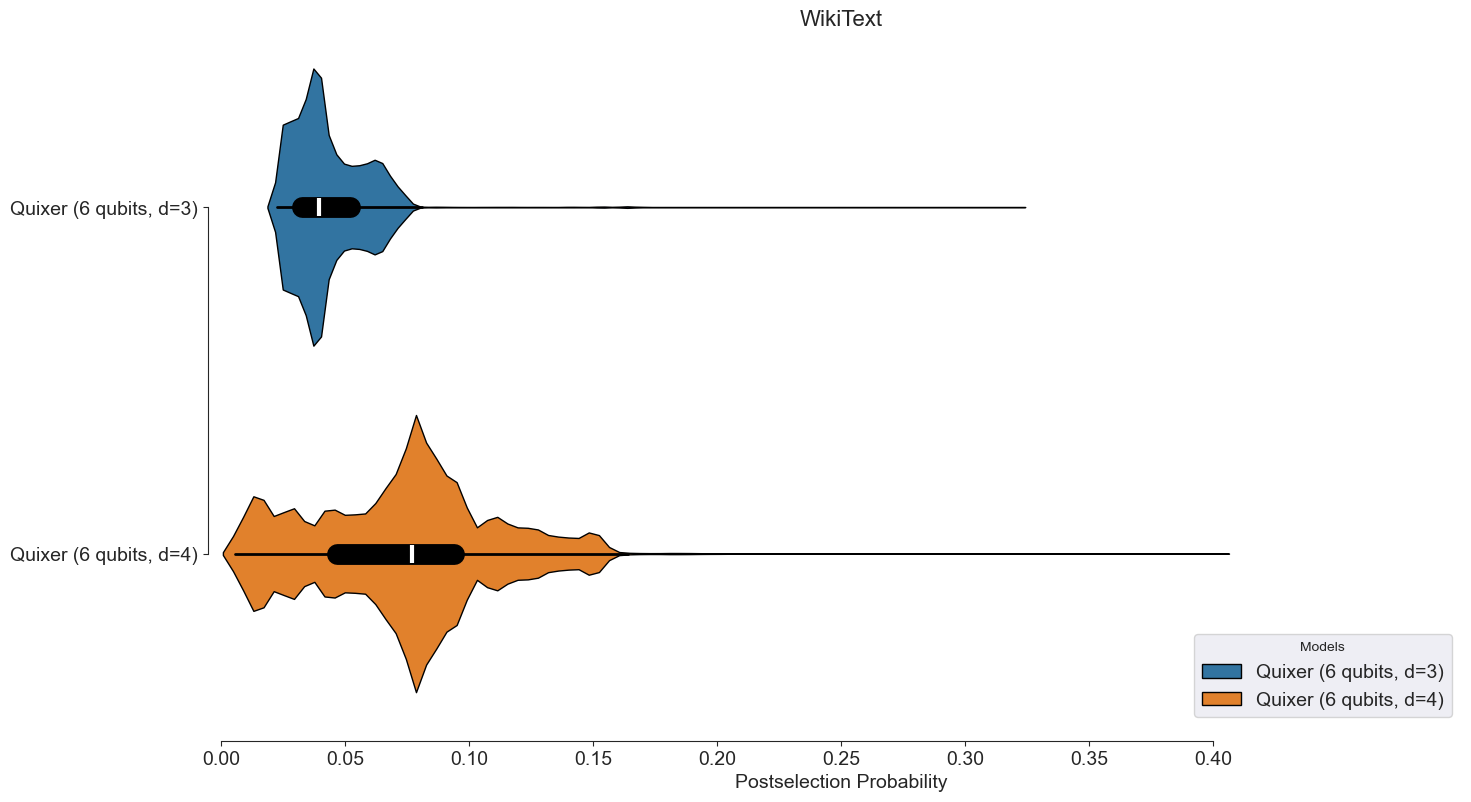

In [18]:
# plot the Half violin plot of the postselection probabilities
plt.figure(figsize=(16, 9))
with sns.axes_style("ticks"):
    sns.violinplot(data=postselection_prob, orient='h', linewidth=1, legend=True, linecolor="k", inner_kws=dict(box_width=15, whis_width=2))
    sns.despine(offset=10, trim=True)
plt.grid(False)
plt.title(dataset_dir[:-1], fontsize=16)
#plt.ylabel('Model')
plt.xlabel('Postselection Probability', fontsize=14)
plt.legend(title='Models', loc='lower right', fontsize=14)
# set labels font size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# limit the x-axis to the range [0, 0.05]
plt.xlim(0, 0.5)
plt.savefig(dataset_dir + dataset_dir[:-1] + '_postselection_prob_d.png', dpi=300, bbox_inches='tight')